# Pràctica III - ``PyTorch``

<a href="https://pytorch.org/"> ![PyTorch](https://pypi-camo.freetls.fastly.net/ed3839e1c11e779b508097969affa63d0968692b/68747470733a2f2f6769746875622e636f6d2f7079746f7263682f7079746f7263682f7261772f6d61696e2f646f63732f736f757263652f5f7374617469632f696d672f7079746f7263682d6c6f676f2d6461726b2e706e67) </a>


``PyTorch`` és una de les biblioteques més utilitzades actualment en l’àmbit de la intel·ligència artificial i l’aprenentatge automàtic. Desenvolupada inicialment per Facebook AI Research (FAIR), s’ha consolidat com una eina de referència per a investigadors i professionals gràcies a la seva flexibilitat, senzillesa d’ús i potència en el càlcul numèric.

Una de les grans fortaleses de ``PyTorch`` és el seu model de gràfic dinàmic (define-by-run). Això significa que la definició del flux de càlcul es construeix i s’executa de manera simultània, cosa que facilita el desenvolupament i la depuració de models complexos. Aquesta flexibilitat contrasta amb altres marcs que utilitzen gràfics estàtics, i ha fet que ``PyTorch`` sigui especialment popular en la recerca acadèmica.

En aquesta assignatura treballarem amb ``PyTorch`` per comprendre els fonaments de l’aprenentatge profund, implementar xarxes neuronals i experimentar amb diferents arquitectures.

### Conceptes claus

- Capa. Conjunt de perceptrons (neurones artificials) organitzats en paral·lel. Cada perceptró fa un càlcul sobre les entrades amb uns pesos i un biaix, i la capa combina totes aquestes sortides per generar la següent representació de les dades.
- Funcions d’activació. Introdueixen no-linealitat en les capes de la xarxa. Sense elles, la xarxa seria només una combinació lineal de perceptrons i no podria aprendre patrons complexos. Exemples habituals són ReLU, Sigmoid i Tanh
- Funció de pèrdua: mesura la diferència entre la sortida del model i la resposta desitjada; és la guia per saber si l’aprenentatge millora.
- Backpropagation: procés que calcula els gradients de la pèrdua respecte als paràmetres de la xarxa per saber com ajustar-los.
- Optimitzador: algoritme (com SGD o Adam) que actualitza els pesos de la xarxa segons els gradients, millorant progressivament el rendiment del model.


## Exemple

Entrenar i definir un model amb ``PyTorch`` és més complex que no amb ``scikit-learn``. Tot seguit un exemple amb dades sintètiques.

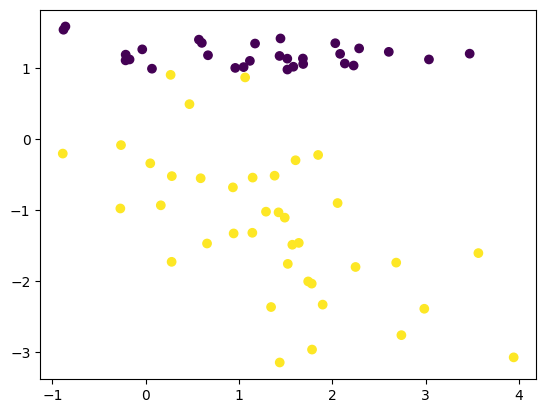

In [13]:
import copy

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

# Generació del conjunt de mostres
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, class_sep=1.25,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=(y_train==0))  # Mostram el conjunt de mostres el color indica la classe
plt.show()

### Definim el model

En PyTorch, un model s’estructura com una classe que hereta de nn.Module. Aquesta classe conté:

1. El constructor (__init__): on es defineixen les capes del model (per exemple, nn.Linear, nn.Conv2d, etc.).
2. El mètode forward: que especifica com passen les dades a través de les capes i les funcions d’activació.

Això permet encapsular l’arquitectura de la xarxa de manera clara i reutilitzable.

Una capa lineal a PyTorch es defineix com:

```python
nn.Linear(in_features, out_features)
```

On:
``in_features``, és el nombre de valors que rep cada neurona de la capa (dimensió de l’entrada).
``out_features``, és el nombre de neurones de la capa (dimensió de la sortida).

La regla bàsica és que el nombre de sortides (``out_features``) d’una capa ha de coincidir amb el nombre d’entrades (``in_features`) de la següent.

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)  # Apply ReLU activation to hidden layer output
        x = F.sigmoid(x)

        return x

### Entrenament

Entrenar una xarxa neuronal com un MLP implica uns quants passos essencials: forward pass, càlcul de la pèrdua, backpropagation i actualització dels paràmetres. PyTorch ofereix una manera flexible i modular de gestionar aquest procés.

---


### 1. Escollir una funció de pèrdua

La **funció de pèrdua** mesura la diferència entre les prediccions del model i les etiquetes reals.

Per a tasques de classificació:

```python
criterion = nn.CrossEntropyLoss()
```

---

### 2. Seleccionar un optimitzador

Un optimitzador actualitza els paràmetres del model utilitzant els gradients calculats durant el backpropagation.

Exemple amb descens estocàstic de gradient (SGD):

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```

**Adam**:
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

---

### 3. Bucle d’entrenament

Aquest és el nucli del procés d’entrenament. Per a cada època (un recorregut complet pel conjunt de dades), es realitza:

#### a. Forward Pass

Es calculen les prediccions del model:

```python
outputs = model(inputs)
```

#### b. Funció de pèrdua
Es calcula la distància entre les predicció i el *ground truth*:

```python
loss = criterion(outputs, targets)
```

#### c. Backward Pass
Es calculen els gradients de la pèrdua respecte als paràmetres del model:

```python
loss.backward()
```

#### d. Actualització de paràmetres
S’apliquen els gradients per actualitzar els paràmetres del model:
```python
optimizer.step()
```

#### e. Reiniciam els Gradients
Netejam els gradients abans de la nova iteració:
```python
optimizer.zero_grad()
```

**Exemple tot junt**:
```python
for epoch in range(num_epochs):
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

#### 4. Evaluació

Una vegada entrenat volem avaluar el model amb el conjunt de validació. En aquest cas no volem guardar cap informació del gradient, per això emprarem la instrucció ``torch.no_grad()``.

```python
model.eval()
with torch.no_grad():
    predictions = model(test_inputs)
```

---

## Resum

| Pas                | Propòsit                                           |
|--------------------|---------------------------------------------------|
| Funció de pèrdua   | Mesurar l’error de predicció                      |
| Optimitzador       | Actualitzar els pesos utilitzant els gradients   |
| Forward Pass       | Predir les sortides                               |
| Pèrdua + Backward  | Calcular els gradients                             |
| Pas de l’optimitzador | Ajustar els pesos                               |
| Zero Grad          | Evitar l’acumulació de gradients                  |
| Avaluació          | Provar el rendiment sense calcular gradients      |



In [14]:
LR = 1e-3
EPOCHS = 1000

criterion = nn.BCELoss()

In [4]:
best_acc = 0
best_weights = None

losses = []
accuracy = []

net = MLP()
optimizer = torch.optim.Adam(net.parameters(), lr=LR)

for epoch in range(EPOCHS):
    net.train()
    output = net(torch.Tensor(X_train))
    loss = criterion(output, torch.Tensor(y_train.reshape(-1, 1)))

    losses.append(loss.detach().numpy())

    loss.backward()
    optimizer.step()

    net.eval()
    output_val = net(torch.Tensor(X_test))

    acc = accuracy_score(y_train, (output.detach() > 0.5).int())
    acc_val = accuracy_score(y_test, (output_val.detach() > 0.5).int())

    if acc_val > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(net.state_dict())

    accuracy.append(acc_val)
net.load_state_dict(best_weights);

## Tasca a fer

1. Modificar el model per afegir dues capes més lineals. Millora els resultats respecte el perceptró?
2. Entrenar un model amb el conjunt de dades del Titanic que vàrem treballar a la sessió anterior.

In [19]:
# TASCA 1

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)  # Apply ReLU activation to hidden layer output
        x = F.sigmoid(x)

        return x

class MLP2(nn.Module):
    def __init__(self):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))

        return x

def entrenar_model(model, X_train, y_train, X_test, y_test, lr=1e-3, epochs=1000):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_acc = 0
    best_weights = None
    losses, accuracy = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        output = model(torch.Tensor(X_train))
        loss = criterion(output, torch.Tensor(y_train.reshape(-1, 1)))
        losses.append(loss.detach().numpy())

        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            output_train = model(torch.Tensor(X_train))
            output_val = model(torch.Tensor(X_test))

            acc_train = accuracy_score(y_train, (output_train > 0.5).int())
            acc_val = accuracy_score(y_test, (output_val > 0.5).int())

        if acc_val > best_acc:
            best_acc = acc_val
            best_weights = copy.deepcopy(model.state_dict())

        accuracy.append(acc_val)

    model.load_state_dict(best_weights)
    return losses, accuracy, best_acc

net1 = MLP()
losses1, accs1, best_acc1 = entrenar_model(net1, X_train, y_train, X_test, y_test)

net2 = MLP2()
losses2, accs2, best_acc2 = entrenar_model(net2, X_train, y_train, X_test, y_test)

print(f"Millor acc MLP (1 capa): {best_acc1:.6f}")
print(f"Millor acc MLP2 (3 capes): {best_acc2:.6f}")

Millor acc MLP (1 capa): 0.969697
Millor acc MLP2 (3 capes): 0.969697


In [20]:
# TASCA 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tractament de dades complet

df = pd.read_csv('train.csv')

# 1. Codificació de variables categòriques
categoricals = ['Sex', 'Embarked', 'Pclass']
df = pd.get_dummies(df, columns=categoricals, drop_first=True)

# 2. Eliminació de columnes sense informació
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 3. Tractament de Nans
# print(df.isna().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())

# 4. Normalització
X = df.drop(columns=['Survived'])
y = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = torch.Tensor(X_train)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test  = torch.Tensor(X_test)
y_test  = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


class TitanicMLP(nn.Module):
    def __init__(self, input_dim):
        super(TitanicMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

net = TitanicMLP(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 1000
best_acc = 0
best_weights = None

for epoch in range(EPOCHS):
    net.train()
    output = net(X_train)
    loss = criterion(output, y_train)

    losses.append(loss.detach().numpy())

    loss.backward()
    optimizer.step()

    net.eval()
    output_val = net(X_test)

    acc = accuracy_score(y_train, (output.detach() > 0.5).int())
    acc_val = accuracy_score(y_test, (output_val.detach() > 0.5).int())

    if acc_val > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(net.state_dict())

    accuracy.append(acc_val)

print("Millor accuracy al test:", best_acc)
net.load_state_dict(best_weights)

Millor accuracy al test: 0.827247191011236


<All keys matched successfully>